In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
pyber_data = pd.merge(city_data_to_load,ride_data_to_load,on="city")
# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city types
rural_df = pyber_data.loc[pyber_data['type']=="Rural"]
rides_per_city_1 = rural_df.groupby("city").count()
average_fare_1 = rural_df.groupby("city").mean()

suburban_df = pyber_data.loc[pyber_data['type']=="Suburban"]
rides_per_city_2 = suburban_df.groupby("city").count()
average_fare_2 = suburban_df.groupby("city").mean()

urban_df = pyber_data.loc[pyber_data['type']=="Urban"]
rides_per_city_3 = urban_df.groupby("city").count()
average_fare_3 = urban_df.groupby("city").mean()

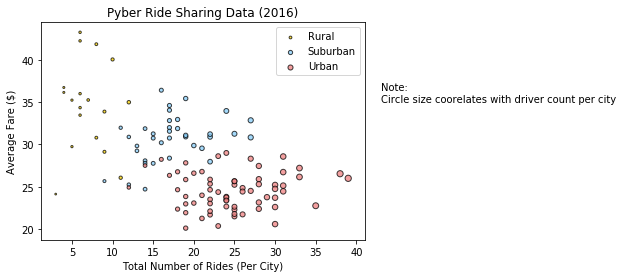

In [8]:
# Build the scatter plots for each city types

x_axis_1 = rides_per_city_1["ride_id"].tolist()
y_axis_1 = average_fare_1["fare"].tolist()
plt.scatter(x_axis_1, y_axis_1, marker="o",facecolors="gold", edgecolors="black",
            s=x_axis_1*20, alpha=0.75, label="Rural")

x_axis_2 = rides_per_city_2["ride_id"].tolist()
y_axis_2 = average_fare_2["fare"].tolist()
plt.scatter(x_axis_2, y_axis_2, marker="o",facecolors="lightskyblue", edgecolors="black",
            s=x_axis_2*20, alpha=0.75, label="Suburban")

x_axis_3 = rides_per_city_3["ride_id"].tolist()
y_axis_3 = average_fare_3["fare"].tolist()
plt.scatter(x_axis_3, y_axis_3, marker="o", facecolors="lightcoral", edgecolors="black",
            s=x_axis_3*20, alpha=0.75, label="Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend()
# Incorporate a text label regarding circle size
plt.text( 43,35,'Note:\nCircle size coorelates with driver count per city')
plt.subplots_adjust(left=0.15)
# Save Figure
plt.savefig("Bubble_Plot.png")
# Show plot
plt.show()

## Total Fares by City Type

In [9]:
# Calculate Type Percents
total_fares = pyber_data["fare"].sum()

urban_fares = urban_df["fare"].sum()
urban_percent_fare = urban_fares/total_fares*100

suburban_fares = suburban_df["fare"].sum()
suburban_percent_fare = suburban_fares/total_fares*100

rural_fares = rural_df["fare"].sum()
rural_percent_fare = rural_fares/total_fares*100


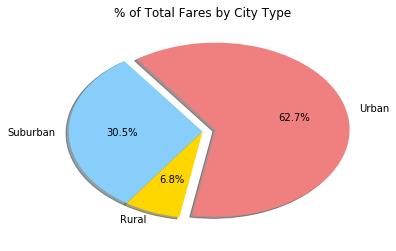

In [10]:
# Build Pie Chart
labels = ["Urban","Suburban","Rural"]
sizes = [urban_percent_fare,suburban_percent_fare,rural_percent_fare]
colors = ["lightcoral","lightskyblue","gold"]
plt.pie(sizes, explode=(0.1, 0, 0), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Pie_Chart_Fares.png")
plt.show()

## Total Rides by City Type

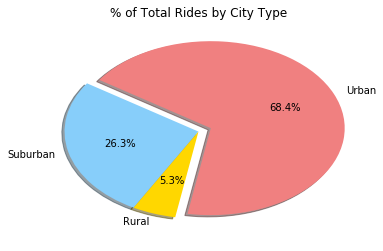

In [11]:
# Calculate Ride Percents
total_rides = pyber_data["ride_id"].count()

urban_rides = urban_df["ride_id"].count()
urban_percent_rides = urban_rides/total_rides*100

suburban_rides = suburban_df["ride_id"].count()
suburban_percent_rides = suburban_rides/total_rides*100

rural_rides = rural_df["ride_id"].count()
rural_percent_rides = rural_rides/total_rides*100

# Build Pie Chart
labels = ["Urban","Suburban","Rural"]
sizes = [urban_percent_rides,suburban_percent_rides,rural_percent_rides]
colors = ["lightcoral","lightskyblue","gold"]
plt.pie(sizes, explode=(0.1, 0, 0), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pie_Chart_Rides.png")
plt.show()


## Total Drivers by City Type

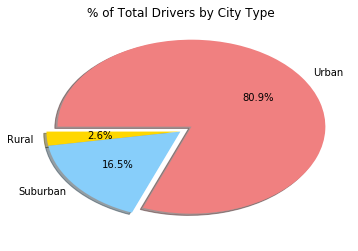

In [12]:
# Calculate Driver Percents
total_drivers = city_data_to_load["driver_count"].sum()

drivers_count = city_data_to_load.groupby("type").sum()
drivers_percent = drivers_count/total_drivers*100

# Build Pie Charts

labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
sizes = drivers_percent["driver_count"].tolist()
plt.pie(sizes, explode=(0, 0, 0.1), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pie_Chart_drivers.png")
plt.show()